<a href="https://colab.research.google.com/github/Alice9th/Python_Challenges/blob/master/17_1_2_THEORY_Implementing_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Get the data

In [ ]:
# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.med', 'sci.space'], remove=('headers', 'footers', 'quotes'))

In [ ]:
type(newsgroups)

sklearn.utils._bunch.Bunch

In [ ]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [ ]:
type(newsgroups['data'])

list

In [ ]:
newsgroups['data'][0:3]

['\n\n\n\n\nCute anecdote, but hardly indicative of the population.  From the responses\nI\'ve received to that post (all from men, by the way) I get the impression\nthat unless a person is willing to drop down and masturbate whenever the\nneed or desire strikes, then that person is very hung up on sex.\n\nWith tv programs about "boobs" (Seinfeld) and "masturbation (again Seinfeld)\nand with condoms being handed out in high schools and with the teenage\npregnancy rate and the high abortion rate here in the States, I would\nnot assume that we American\'s are frightened of sex.  Rather we are a bit\nstupid about it.  Healthy sexuality does not require flamboyance or\npromiscuity.  It requires responsibility.\n',
 '\n\nYou should have heard Prof. McNally , from my days as an astronomy\nundergraduate, denouncing photon pollution. It was easy to imagine him\ntaking practical steps to modify the sodium lamps on the street\noutside Mill Hill observatory with a 12-gauge shotgun :-)\n\nHowever,

In [ ]:
newsgroups.filenames

array(['/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59604',
       '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.space/61351',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61188',
       ...,
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.space/60954',
       '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.space/61560',
       '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.med/58911'],
      dtype='<U86')

In [ ]:
newsgroups.target_names

['sci.med', 'sci.space']

In [ ]:
# 0: Medicine
# 1: Space
newsgroups.target

array([0, 1, 1, ..., 1, 1, 0])

# TF-IDF

TF-IDF, or Term Frequency-Inverse Document Frequency, is used to evaluate the importance of a word in a document relative to a collection of documents (corpus).

* Term frequency (TF): measures how frequently a term appears in a document, normalized by the document's length.
* The inverse document frequency (IDF): assesses the rarity of the term across the entire corpus, reducing the weight of common terms.

Mathematically, the formula is given by:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

Where

$$ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
$$

and

$$ \text{IDF}(t) = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing term } t}\right).
$$

### Example TF-IDF

In [ ]:
# Example tf-idf
sample_data = [
    "This is the first document. Talks about a patient description", # Doc 1

    "This document is the second document. Is more about Space Science", # Doc 2

    "And this is the third one. is about medicine",  # Doc 3

    "Is this the first document with some extra random words?",  # Doc 4
]

# Create the TF-IDF vectorizer
example_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the dataset
example_tfidf_matrix = example_vectorizer.fit_transform(sample_data)

example_tfidf_matrix

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [ ]:
# Let's print the resuliting tf-idf
print(example_tfidf_matrix)

# Why we can't see all the elements?

  (0, 1)	0.3457831381910465
  (0, 9)	0.5417361046803605
  (0, 4)	0.5417361046803605
  (0, 0)	0.5417361046803605
  (1, 1)	0.5932972690785747
  (1, 7)	0.4647574100194299
  (1, 8)	0.4647574100194299
  (1, 6)	0.4647574100194299
  (2, 3)	1.0
  (3, 1)	0.3457831381910465
  (3, 2)	0.5417361046803605
  (3, 5)	0.5417361046803605
  (3, 10)	0.5417361046803605


<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [ ]:
# Let's see the feature names
example_vectorizer.get_feature_names_out()

array(['description', 'document', 'extra', 'medicine', 'patient',
       'random', 'science', 'second', 'space', 'talks', 'words'],
      dtype=object)

In [ ]:
# Let's check the matrix
example_tfidf_matrix.toarray()

array([[0.5417361 , 0.34578314, 0.        , 0.        , 0.5417361 ,
        0.        , 0.        , 0.        , 0.        , 0.5417361 ,
        0.        ],
       [0.        , 0.59329727, 0.        , 0.        , 0.        ,
        0.        , 0.46475741, 0.46475741, 0.46475741, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.34578314, 0.5417361 , 0.        , 0.        ,
        0.5417361 , 0.        , 0.        , 0.        , 0.        ,
        0.5417361 ]])

In [ ]:
# If we inverse transform
example_vectorizer.inverse_transform(example_tfidf_matrix)

[array(['description', 'patient', 'talks', 'document'], dtype='<U11'),
 array(['science', 'space', 'second', 'document'], dtype='<U11'),
 array(['medicine'], dtype='<U11'),
 array(['words', 'random', 'extra', 'document'], dtype='<U11')]

## Let's apply TF-IDF to our dataset

In [ ]:
newsgroups.target_names

['sci.med', 'sci.space']

In [ ]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the dataset
tfidf_matrix = vectorizer.fit_transform(newsgroups.data)

In [ ]:
tfidf_matrix
# Is a 1977 x 27257 matrix :o!

<1977x27257 sparse matrix of type '<class 'numpy.float64'>'
	with 142338 stored elements in Compressed Sparse Row format>

### Let's use this to train a ML model

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, newsgroups.target, test_size=0.2, random_state=42)

In [ ]:
# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9393939393939394
Classification Report:
              precision    recall  f1-score   support

     sci.med       0.95      0.93      0.94       193
   sci.space       0.93      0.95      0.94       203

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396



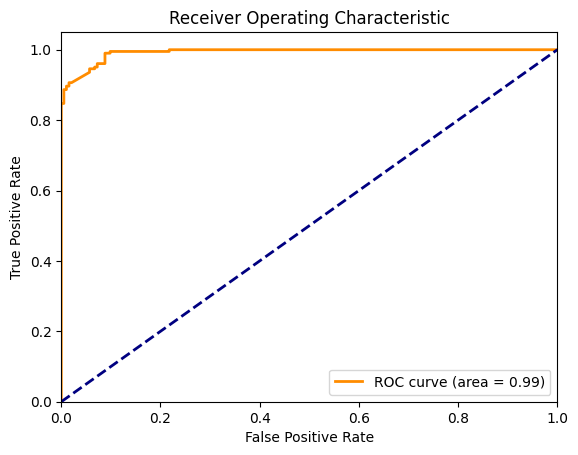

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions (probabilities) for ROC-AUC
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()